In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd

file_path = 'C:/Users/Lenovo/Documents/Python/titanic3.xlsx'  # Remplacer par le chemin vers votre fichier Excel
data = pd.read_excel(file_path)
data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
print("Dimensions du dataset:", data.shape)

Dimensions du dataset: (1309, 14)


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [9]:
print(data.describe(include='all'))

             pclass     survived                  name   sex          age  \
count   1309.000000  1309.000000                  1309  1309  1046.000000   
unique          NaN          NaN                  1307     2          NaN   
top             NaN          NaN  Connolly, Miss. Kate  male          NaN   
freq            NaN          NaN                     2   843          NaN   
mean       2.294882     0.381971                   NaN   NaN    29.881135   
std        0.837836     0.486055                   NaN   NaN    14.413500   
min        1.000000     0.000000                   NaN   NaN     0.166700   
25%        2.000000     0.000000                   NaN   NaN    21.000000   
50%        3.000000     0.000000                   NaN   NaN    28.000000   
75%        3.000000     1.000000                   NaN   NaN    39.000000   
max        3.000000     1.000000                   NaN   NaN    80.000000   

              sibsp        parch    ticket         fare        cabin embark

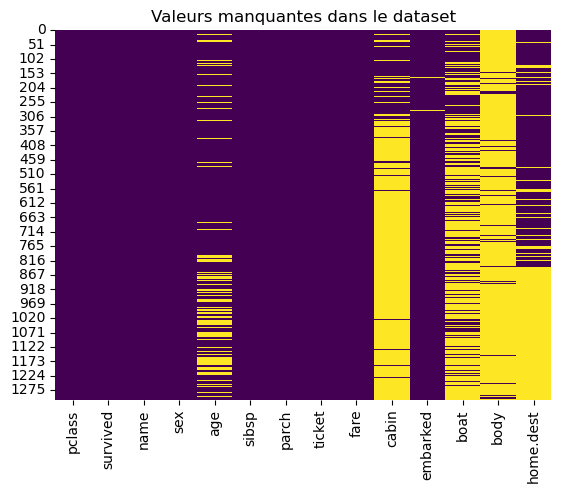

In [10]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Valeurs manquantes dans le dataset')
plt.show()


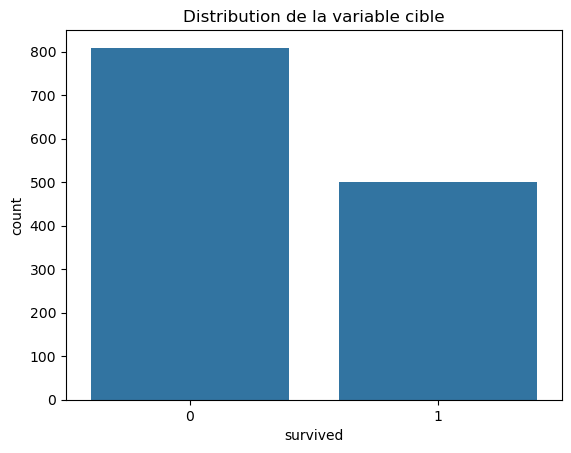

In [11]:
sns.countplot(x='survived', data=data)
plt.title('Distribution de la variable cible')
plt.show()


In [12]:
print(data.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [43]:
data = data.drop(columns=['cabin', 'boat', 'body'])

In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1307 non-null   object 
 10  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None


In [14]:
data['age'] = data['age'].fillna(data['age'].median())

In [45]:
print(data['age'])

0       0.361169
1       0.009395
2       0.022964
3       0.373695
4       0.311064
          ...   
1304    0.179540
1305         NaN
1306    0.329854
1307    0.336117
1308    0.361169
Name: age, Length: 1309, dtype: float64


In [46]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [48]:
print(data['embarked'])

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object


In [49]:
data['fare'] = pd.to_numeric(data['fare'], errors='coerce')

In [50]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [53]:
print(data['fare'])

0       0.412503
1       0.295806
2       0.295806
3       0.295806
4       0.295806
          ...   
1304    0.028213
1305    0.028213
1306    0.014102
1307    0.014102
1308    0.015371
Name: fare, Length: 1309, dtype: float64


In [51]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

In [52]:
print(data['sex'])

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64


In [19]:
data = pd.get_dummies(data, columns=['embarked'], drop_first=True)

In [56]:
data['family_size'] = data['sibsp'] + data['parch']

In [57]:
print(data['family_size'])

0       0
1       3
2       3
3       3
4       3
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: family_size, Length: 1309, dtype: int64


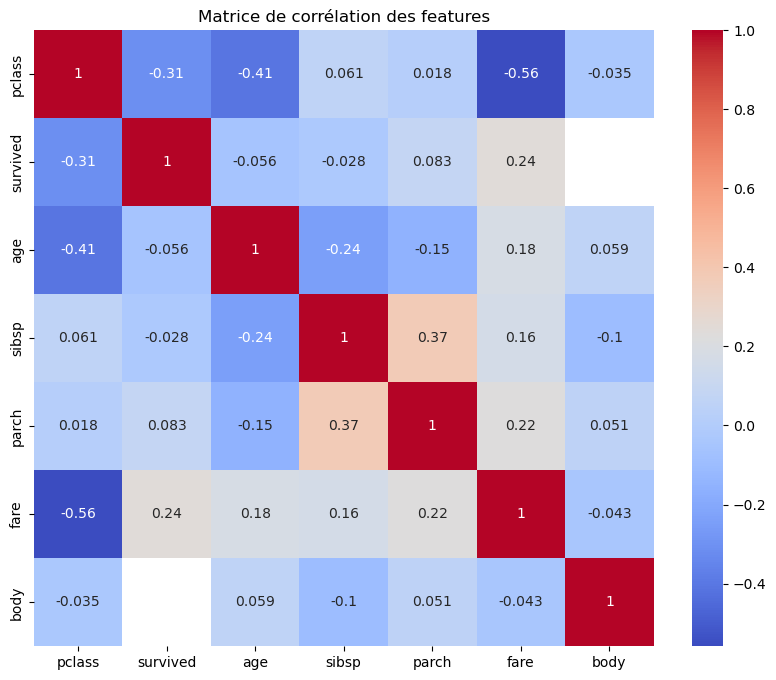

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifiez les colonnes numériques uniquement
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcul et affichage de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des features')
plt.show()


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['age', 'fare']] = scaler.fit_transform(data[['age', 'fare']])


In [32]:
X = data.drop(columns=['survived', 'name', 'ticket', 'home.dest'])
y = data['survived']


In [34]:
X.to_csv('X_cleaned.csv', index=False)
y.to_csv('y_cleaned.csv', index=False)
